# Scaling Variables

In this notebook we will demonstrate a number of scaling techiques to ensure consistentcy across features.

### Import Basic Packages

In [ ]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Import Data

We are working with features that describe retail stores, the products they have available and whether the store is recommended or not. This is a classification scenario and recommended is the target variable.


In [2]:
# Import store sales dataset
df_stores = pd.read_csv('stores.csv')
df_stores

,store_area,items_available,daily_cust_count,store_sales,city,recommended
0,2157,1961,530,66490,Vancouver,0
1,1928,2278,210,39820,Surrey,0
2,2090,1609,936,70213,Burnaby,1
3,2942,1923,744,59103,Vancouver,0
4,3037,2111,450,46620,Surrey,0
...,...,...,...,...,...,...
659,1619,1366,1340,62940,Langley,0
660,2167,2020,980,66070,Vancouver,1
661,1884,1892,630,43190,Surrey,0
662,1211,1447,1110,40730,Langley,0


In [3]:
# Import Testing Data
df_stores_test = pd.read_csv('stores_test.csv')

### MinMax Scaling (Normalization)

One of the simplest methods to scale our data is to use minmax scaling.

This method focuses on the absolute range of each feature, brings all values into a range of 0 to 1.

We wil be using SKLearn's **MinMaxScaler**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [2]:
# Import store sales dataset
df_stores = pd.read_csv('stores.csv')
df_stores

,store_area,items_available,daily_cust_count,store_sales,city,recommended
0,2157,1961,530,66490,Vancouver,0
1,1928,2278,210,39820,Surrey,0
2,2090,1609,936,70213,Burnaby,1
3,2942,1923,744,59103,Vancouver,0
4,3037,2111,450,46620,Surrey,0
...,...,...,...,...,...,...
659,1619,1366,1340,62940,Langley,0
660,2167,2020,980,66070,Vancouver,1
661,1884,1892,630,43190,Surrey,0
662,1211,1447,1110,40730,Langley,0


In [3]:
numeric_cols = df_stores.drop('recommended', axis = 1).select_dtypes('number').columns

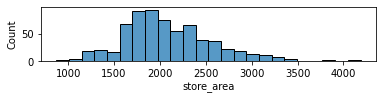

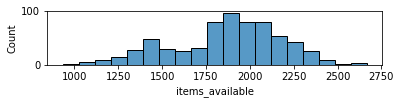

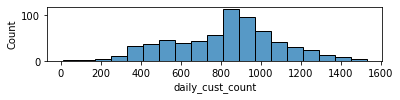

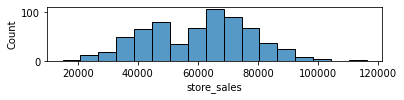

In [4]:
# plot each of the numeric features

for feature in numeric_cols:
    fig, (ax) = plt.subplots(1,1,figsize=(6,1))
    sns.histplot(df_stores[feature], ax = ax)
    plt.show()

In [5]:
# View the descriptive stats for each numeric column in the dataframe
df_stores.describe()

,store_area,items_available,daily_cust_count,store_sales,recommended
count,664.000000,664.000000,664.000000,664.000000,664.000000
mean,2095.987952,1860.156627,818.875000,60367.125000,0.323795
std,501.502809,310.416296,265.931105,17084.923008,0.468276
min,869.000000,932.000000,10.000000,14920.000000,0.000000
25%,1755.500000,1670.000000,627.500000,46050.000000,0.000000
50%,2007.000000,1900.500000,850.000000,62895.000000,0.000000
75%,2362.000000,2072.250000,988.000000,72415.000000,1.000000
max,4186.000000,2667.000000,1530.000000,116320.000000,1.000000


In [6]:
# Import MinMaxScaler and fit and transform to the training data 
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

df_minmax = df_stores.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])
df_minmax

,store_area,items_available,daily_cust_count,store_sales,city,recommended
0,0.388303,0.593084,0.342105,0.508580,Vancouver,0
1,0.319264,0.775793,0.131579,0.245562,Surrey,0
2,0.368104,0.390202,0.609211,0.545296,Burnaby,1
3,0.624962,0.571182,0.482895,0.435730,Vancouver,0
4,0.653603,0.679539,0.289474,0.312623,Surrey,0
...,...,...,...,...,...,...
659,0.226108,0.250144,0.875000,0.473570,Langley,0
660,0.391317,0.627089,0.638158,0.504438,Vancouver,1
661,0.305999,0.553314,0.407895,0.278797,Surrey,0
662,0.103105,0.296830,0.723684,0.254536,Langley,0


In [9]:
#Apply the fitted scalar to the test data
df_test_minmax = df_stores_test.copy()
df_test_minmax[numeric_cols] = minmax_scaler.transform(df_test_minmax[numeric_cols])

By exploring the describe function we can now see that our features have a mean of zero and a stdev of 1.

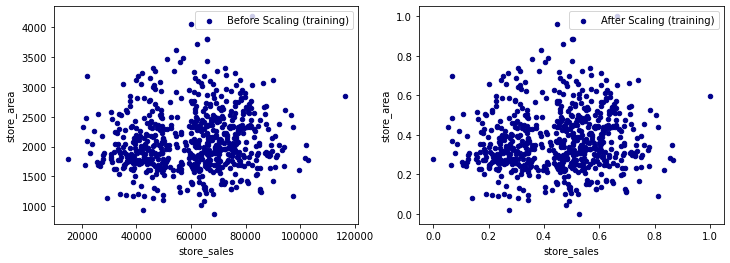

In [7]:
#Plot a scatter chart of the Store_Sales column and Store_Area column before and after minmax scaling
fig, (before, after) = plt.subplots(1, 2,figsize=(12,4))
before = df_stores.plot.scatter(ax = before, x='store_sales', y='store_area', label = 'Before Scaling (training)', color = 'darkblue')
after = df_minmax.plot.scatter(ax = after, x='store_sales', y='store_area', label = 'After Scaling (training)', color= 'darkblue')

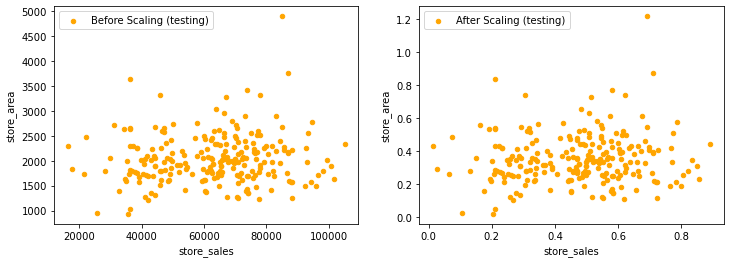

In [11]:
#Plot a scatter chart of the Store_Sales column and Store_Area column before and after minmax scaling
fig, (before, after) = plt.subplots(1, 2,figsize=(12,4))
before = df_stores_test.plot.scatter(ax = before, x='store_sales', y='store_area', label = 'Before Scaling (testing)', color = 'orange')
after = df_test_minmax.plot.scatter(ax = after, x='store_sales', y='store_area', label = 'After Scaling (testing)', color= 'orange')

Our features now occupy a similar feature space on each axis. This wil improve the performance of many machine learning models.

### Using StandardScaler to Standardize Normally Distributed Variables

When our features are normally distributed, we typically prefer to use a standardization technique, to bring the distributions of variables into comparable ranges.

This method focuses on the distribution of the data more than the absolute range, which can be helpful for distributions with tails like the normal distribution.

We wil be using SKLearn's **StandardScaler**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [12]:
# Import both the normally distributed stores data, and the testing dataset
df_stores_norm = pd.read_csv('stores_norm_dist.csv')
df_stores_norm_test = pd.read_csv('stores_norm_dist_test.csv')

# We are working with features that describe retail stores.
# the products they have available and whether the store is recommended or not.
# This is a classification scenario and recommended is the target variable.

In [13]:
numeric_cols = df_stores_norm.drop('recommended', axis = 1).select_dtypes('number').columns

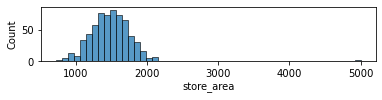

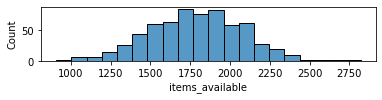

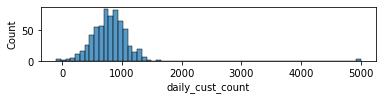

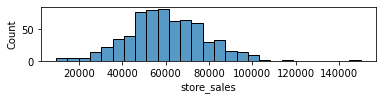

In [14]:
# plot each of the numeric features

for feature in numeric_cols:
    fig, (ax) = plt.subplots(1,1,figsize=(6,1))
    sns.histplot(df_stores_norm[feature], ax = ax)
    plt.show()

In [15]:
# Import standard scalar and fit transform the training data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_stdscale = df_stores_norm.copy()
df_stdscale[numeric_cols] = std_scaler.fit_transform(df_stdscale[numeric_cols])
df_stdscale.describe()

,store_area,items_available,daily_cust_count,store_sales,recommended
count,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,648.000000
mean,-5.184467e-16,3.387208e-16,-2.244432e-17,1.045974e-16,0.279321
std,1.000772e+00,1.000772e+00,1.000772e+00,1.000772e+00,0.449012
min,-2.372331e+00,-2.956288e+00,-2.361091e+00,-2.877187e+00,0.000000
25%,-5.945928e-01,-6.876234e-01,-4.941783e-01,-6.350262e-01,0.000000
50%,-1.163678e-02,6.824269e-03,-4.348422e-02,-6.691888e-02,0.000000
75%,5.390790e-01,7.058552e-01,4.092800e-01,6.762417e-01,1.000000
max,1.083739e+01,3.468364e+00,1.086930e+01,5.092928e+00,1.000000


By exploring the describe function we can now see that our features have a mean of zero and a stdev of 1.

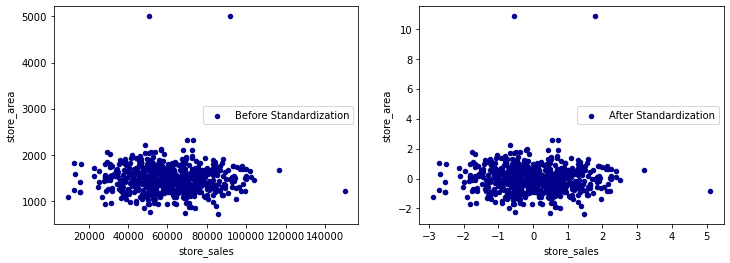

In [16]:
#Plot a scatter chart of the Store_Sales column and Store_Area column before scaling
fig, (before, after) = plt.subplots(1, 2,figsize=(12,4))
before = df_stores_norm.plot.scatter(ax = before, x='store_sales', y='store_area', label = 'Before Standardization', color = 'darkblue')
after = df_stdscale.plot.scatter(ax = after, x='store_sales', y='store_area', label = 'After Standardization', color = 'darkblue')

In [20]:
#Apply the fitted scalar to the test data
df_stdscale_test = df_stores_norm_test.copy()
df_stdscale_test[numeric_cols] = std_scaler.transform(df_stdscale_test[numeric_cols])

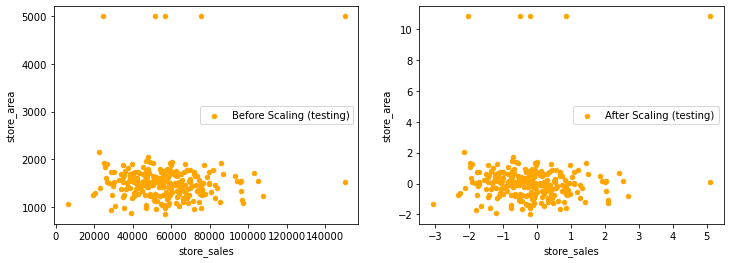

In [21]:
#Plot a scatter chart of the Store_Sales column and Store_Area column before and after minmax scaling
fig, (before, after) = plt.subplots(1, 2,figsize=(12,4))
before = df_stores_norm_test.plot.scatter(ax = before, x='store_sales', y='store_area', label = 'Before Scaling (testing)', color = 'orange')
after = df_stdscale_test.plot.scatter(ax = after, x='store_sales', y='store_area', label = 'After Scaling (testing)', color= 'orange')

### Using Robust Scaler to Scale Features

Robust scaler is not as affected by outliers, as it scales the interquartile range instead of the standard deviation.

To use robust scaler, you can use a similar syntax as the other mehtods from SKLearn:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

robust_scalar.fit()
robust_scalar.fit_transform()
robust_scalar.transform()

### Which Scaling method to use?

In general, there are no rules. The main goal is to transform variables into a comparable range to allow models to balance features fairly.

- This means that all our numeric features should be scaled using the same method.
- If our features our normally distributed, we might favour the standard scaler.
- With outliers, the robust scaler may perform better.

However, the ultimate goal is improved model performance, so our choices should be guided by those metrics.

### Exercise 1 (Basic): Plot the distributions of the numeric variables in the customer experience dataset
Using the below dataset, use plot each distribution so that you can see the different scales of each numeric variable. Notice the potential outliers that may affect our scaling.

In [23]:
#import dataset
df_cx = pd.read_csv('cx_survey_data.csv')
df_cx

,caseid,date,inquiry,wait_time,case_duration,sat_score,solved
0,1,2021-11-28,Bug,680,3129,2,0
1,2,2021-12-03,Bug,745,246,6,1
2,3,2021-12-20,Bug,1199,2686,1,0
3,4,2021-10-02,Bug,205,591,4,1
4,5,2021-11-20,Bug,24,2327,2,0
...,...,...,...,...,...,...,...
164,165,2021-11-28,Discovery,989,1347,6,1
165,166,2021-09-06,Discovery,806,2512,10,0
166,167,2021-12-07,Discovery,1058,154,9,1
167,168,2021-11-26,Discovery,268,155,8,1


In [24]:
#define numeric columns to scale
scale_cols = df_cx.drop(['solved','caseid'], axis = 1).select_dtypes('number').columns

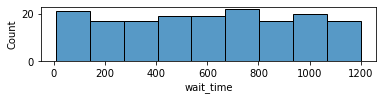

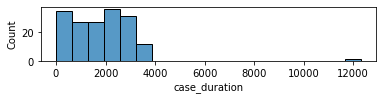

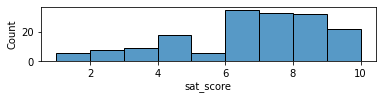

In [25]:
# plot a distribution of each numeric column

for feature in scale_cols:
    fig, (ax) = plt.subplots(1,1,figsize=(6,1))
    sns.histplot(df_cx[feature], ax = ax)
    plt.show()

### Exercise 2 (Advanced): Apply Min Max Scaling to Training & Testing Data

In this exercise you're going to explore what impact an outlier in the training data might cause on the results of minmax scaling.

In [26]:
#fit and transform the min max scaler to the numeric columns
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

df_cx_scaled = df_cx.copy()
df_cx_scaled[scale_cols] = minmax_scaler.fit_transform(df_cx_scaled[scale_cols])
df_cx_scaled.head()

,caseid,date,inquiry,wait_time,case_duration,sat_score,solved
0,1,2021-11-28,Bug,0.563866,0.254026,0.111111,0
1,2,2021-12-03,Bug,0.618487,0.019522,0.555556,1
2,3,2021-12-20,Bug,1.000000,0.217993,0.000000,0
3,4,2021-10-02,Bug,0.164706,0.047584,0.333333,1
4,5,2021-11-20,Bug,0.012605,0.188791,0.111111,0


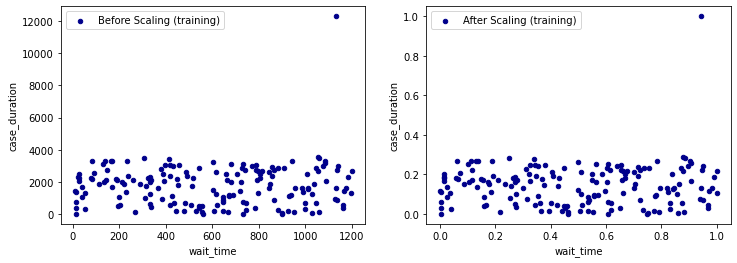

In [27]:
#Plot a scatter chart of the wait_time and case_duration columns before and after scaling on training and testing data
fig, (before, after) = plt.subplots(1, 2,figsize=(12,4))
before = df_cx.plot.scatter(ax = before, x='wait_time', y='case_duration', label = 'Before Scaling (training)', color = 'darkblue')
after = df_cx_scaled.plot.scatter(ax = after, x='wait_time', y='case_duration', label = 'After Scaling (training)', color= 'darkblue')

In [28]:
#import the cx_testing dataset and identify the numeric columns
df_cx_test = pd.read_csv('cx_survey_data_test.csv')

In [29]:
#make a copy of the testing data and transform the numeric columns using the minmax_scaler
df_cx_test_scaled = df_cx_test.copy()
df_cx_test_scaled[scale_cols] = minmax_scaler.transform(df_cx_test_scaled[scale_cols])

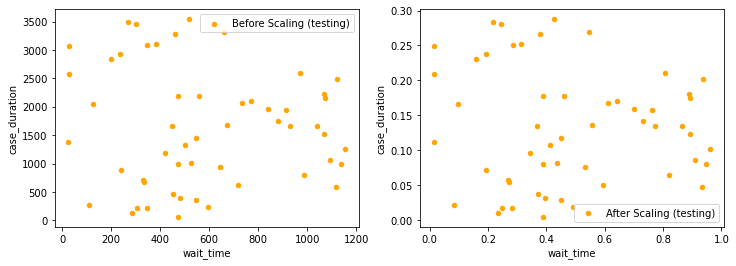

In [30]:
#Plot a scatter chart of the wait_time and case_duration columns before and after scaling on training and testing data
fig, (before, after) = plt.subplots(1, 2,figsize=(12,4))
before = df_cx_test.plot.scatter(ax = before, x='wait_time', y='case_duration', label = 'Before Scaling (testing)', color = 'orange')
after = df_cx_test_scaled.plot.scatter(ax = after, x='wait_time', y='case_duration', label = 'After Scaling (testing)', color= 'orange')